In [1]:
import os
import tarfile
import urllib.request 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


rootpath = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
path = os.path.join("datasets", "housing")
url = rootpath + "datasets/housing/housing.tgz"

def data_fetching(url=url, path=path):
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "housing.tgz")
    urllib.request.urlretrieve(url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=path)
    housing_tgz.close()

In [2]:
data_fetching()

In [3]:
def load_data(path=path):
    csv_path = os.path.join(path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


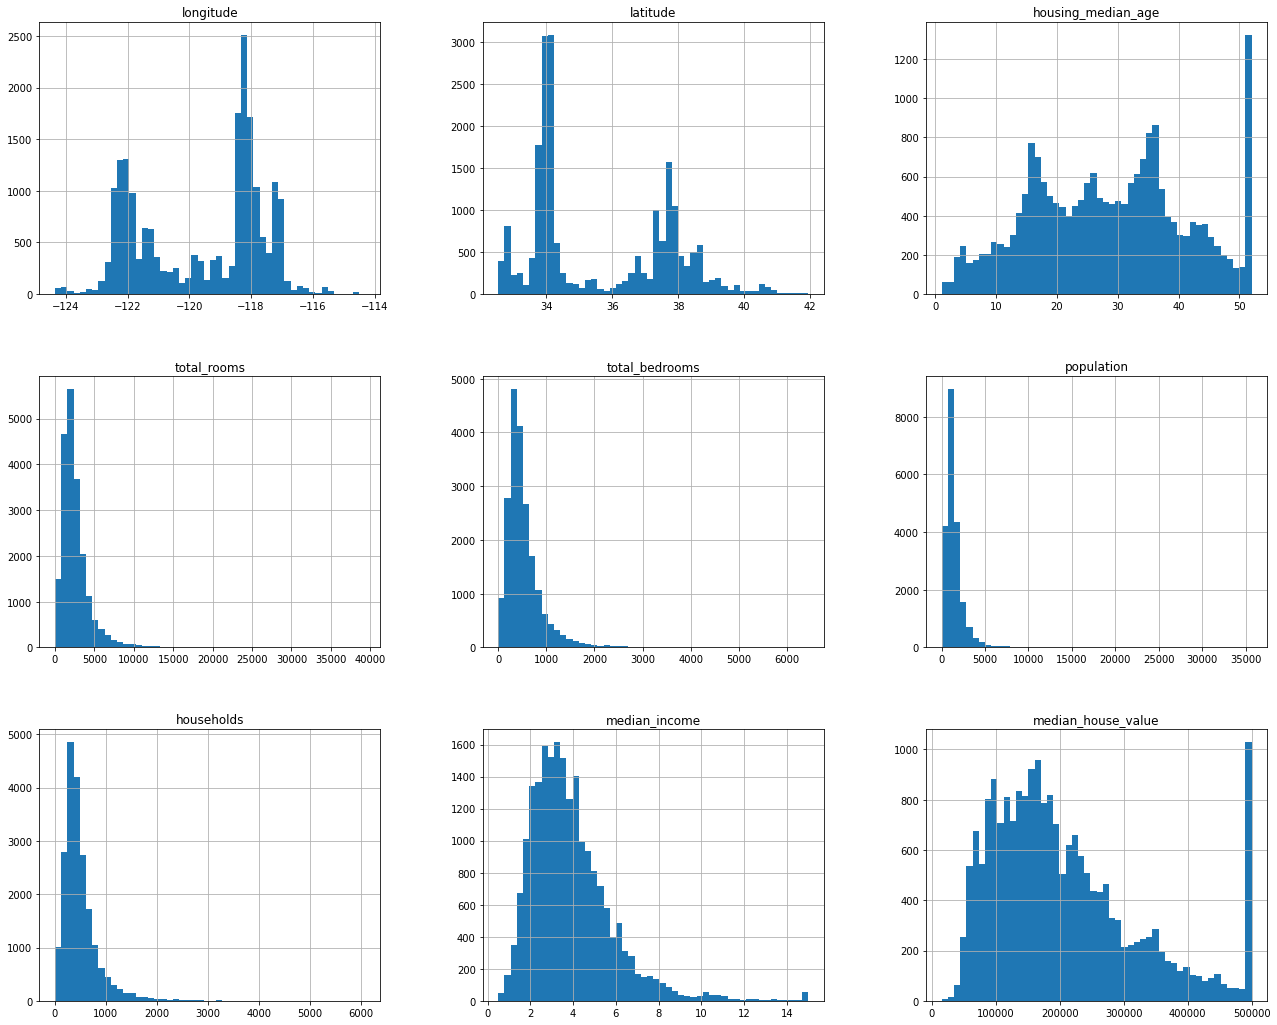

In [9]:
housing.hist(bins=50, figsize=(22,18))
plt.show()

# Test Set Creation

In [10]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [11]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [13]:
len(train_set)

16512

In [14]:
len(test_set)

4128

In [15]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND,4.192201,NaN,3.877437
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND,5.039384,NaN,2.679795
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY,3.977155,NaN,1.360332
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN,6.163636,NaN,3.444444
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,5.492991,NaN,2.483645


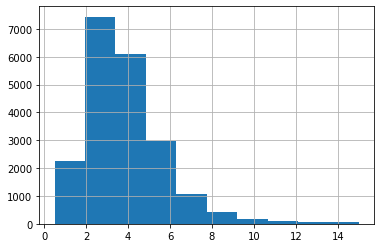

In [16]:
housing["median_income"].hist()

In [17]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

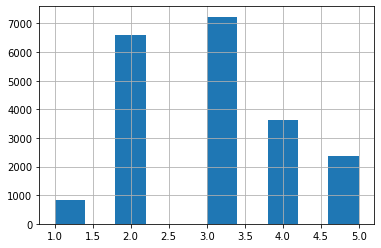

In [18]:
housing["income_cat"].hist()

In [19]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [21]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [22]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [23]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [24]:
def income_prop(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [25]:
compare_props = pd.DataFrame({
    "Overall": income_prop(housing),
    "Stratified": income_prop(strat_test_set),
    "Random": income_prop(test_set),
}).sort_index()

In [26]:
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [27]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [28]:
for _ in (strat_train_set, strat_test_set):
    _.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [29]:
housing = strat_train_set.copy()

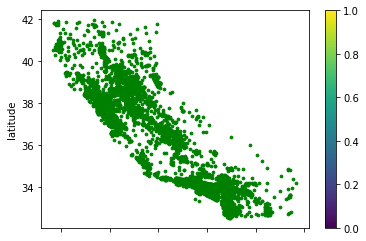

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", color='green', marker= ".", s=30,colorbar=True)

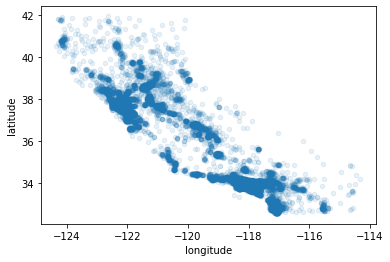

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


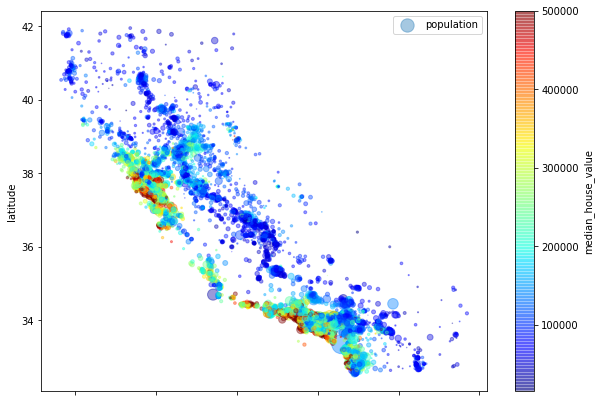

In [32]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

# Looking for Correlations

In [33]:
corr_matrix = housing.corr()

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

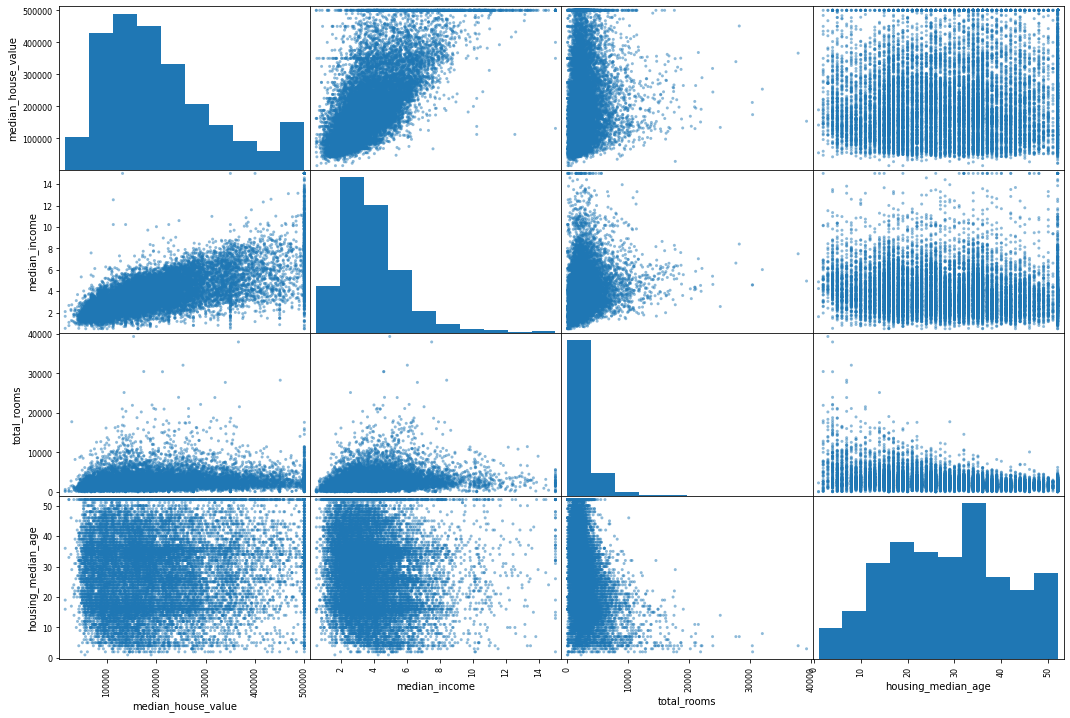

In [34]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(18, 12))
corr_matrix["median_house_value"].sort_values(ascending=False)

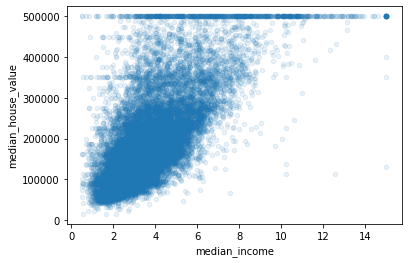

In [35]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

# Experimenting with Attribute Combinations

In [36]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

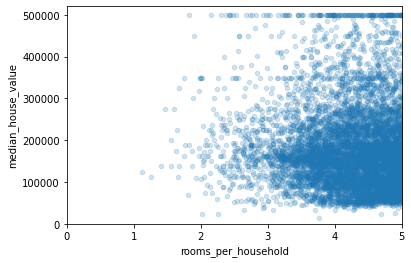

In [37]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [38]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive. The number of rooms per household is also more informative than the total number of rooms in a district—obviously the larger the houses, the more expensive they are.

# Prepare the Data for Machine Learning Algorithms

In [39]:
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy()

# Data Cleaning

In [40]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY,4.707668,NaN,1.317891
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN,4.537074,NaN,3.947896
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,5.826196,NaN,2.403023
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN,4.448980,NaN,2.840136
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN,6.835417,NaN,2.385417


In [41]:
median = housing["total_bedrooms"].median()  
housing["total_bedrooms"].fillna(median, inplace=True)

In [42]:
imputer = SimpleImputer(strategy="median")

In [43]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY,4.707668,NaN,1.317891
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN,4.537074,NaN,3.947896
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN,5.826196,NaN,2.403023
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN,4.448980,NaN,2.840136
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN,6.835417,NaN,2.385417


In [44]:
housing_num = housing.select_dtypes(include=[np.number])

The median can be computed only if the dataset contains numerical attributes. So, we are bout to create a copy of the set without ocean_proximity (text attrib)

In [45]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [46]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [47]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [48]:
housing_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [49]:
X = imputer.transform(housing_num)

# Converting array to Dataframe

In [50]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [51]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,4.707668,0.203027,1.317891
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,4.537074,0.203027,3.947896
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,5.826196,0.203027,2.403023
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,4.448980,0.203027,2.840136
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,6.835417,0.203027,2.385417


In [52]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,6.096552,0.182692,3.167241


# Handling Text and Categorical Attributes

In [53]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.tail(10)

,ocean_proximity
12396,INLAND
16476,INLAND
2271,INLAND
6980,<1H OCEAN
5206,<1H OCEAN
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN
19773,INLAND


In [54]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [55]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Using Hot Encoder

In [56]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [57]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [58]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [59]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Custom Transformers

Transformation Pipelines

In [60]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [61]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown = 'ignore'), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [62]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [63]:
housing_prepared.shape

(16512, 16)

# Select and Train a Model

In [64]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [65]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 83648.54287152 305815.0882093  150013.37994426 188096.42566946
 241840.13952577]


In [66]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [67]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526, -0.12248362,
         0.00622264,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.91166333,
        -0.04081077,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.3709391 ,
        -0.07537122,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997,  1.11587294,
        -0.10680295,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [68]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68160.92435491859

In [69]:
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49058.88337935068

#Desicion Tree Regressor

In [70]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [71]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Better Evaluation Using Cross-Validation

In [72]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [73]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72076.66645327 70254.53570989 69209.55276018 71743.64634726
 70224.43291415 76236.53857477 71789.82800097 74237.92651285
 69235.99559252 70079.70236366]
Mean: 71508.88252295299
Standard deviation: 2144.1436719288486


In [74]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71181.95098096 63825.56512744 67741.07241029 68256.29685279
 66711.2271161  72240.73664717 69981.07976999 68438.51358706
 65946.92067317 70073.85093767]
Mean: 68439.7214102642
Standard deviation: 2408.892846297468


# RandomForestRegressor

In [75]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [76]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18643.965321178945

In [77]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)


In [78]:
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51468.67431659 48558.10945101 46944.27789502 51886.63016622
 47662.87497687 51383.51857789 52459.08101362 50123.08324218
 48713.72491549 54195.07949047]
Mean: 50339.50540453655
Standard deviation: 2206.1714766286996


In [79]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68439.721410
std       2539.196011
min      63825.565127
25%      66968.688440
50%      68347.405220
75%      70050.658146
max      72240.736647
dtype: float64

In [80]:
svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110981.54965314854

# Fine-Tune Model-Grid Search

In [81]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
  ]

forest_reg = RandomForestRegressor(random_state=42) 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [82]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [83]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [84]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65119.22597571509 {'max_features': 2, 'n_estimators': 3}
55223.5947809774 {'max_features': 2, 'n_estimators': 10}
52786.159328222646 {'max_features': 2, 'n_estimators': 30}
60681.200130349374 {'max_features': 4, 'n_estimators': 3}
52490.03868445132 {'max_features': 4, 'n_estimators': 10}
50472.09736091612 {'max_features': 4, 'n_estimators': 30}
58333.75312490932 {'max_features': 6, 'n_estimators': 3}
51766.98839356613 {'max_features': 6, 'n_estimators': 10}
49882.96011935094 {'max_features': 6, 'n_estimators': 30}
59288.94215890149 {'max_features': 8, 'n_estimators': 3}
52040.865576692486 {'max_features': 8, 'n_estimators': 10}
49985.97352309603 {'max_features': 8, 'n_estimators': 30}
63210.50747680449 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54510.12433444709 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58152.56594870564 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51810.53293480496 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [85]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.071435,0.003050,0.004772,0.000298,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.194864e+09,-4.133998e+09,...,-4.240514e+09,1.764248e+08,18,-1.178379e+09,-1.166192e+09,-1.179675e+09,-1.067892e+09,-1.168557e+09,-1.152139e+09,4.245322e+07
1,0.231450,0.005848,0.013881,0.002479,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047299e+09,-2.892648e+09,...,-3.049645e+09,1.016382e+08,11,-5.897880e+08,-5.939724e+08,-5.831137e+08,-5.563197e+08,-6.028045e+08,-5.851997e+08,1.578827e+07
2,0.696767,0.009181,0.034721,0.000278,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.816697e+09,-2.656140e+09,...,-2.786379e+09,8.494102e+07,9,-4.343399e+08,-4.420474e+08,-4.392769e+08,-4.234509e+08,-4.378177e+08,-4.353866e+08,6.464788e+06
3,0.115170,0.002686,0.004845,0.000307,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.527346e+09,-3.834163e+09,...,-3.682208e+09,1.180112e+08,16,-9.844132e+08,-1.073246e+09,-1.019380e+09,-1.001898e+09,-9.793720e+08,-1.011662e+09,3.386051e+07
4,0.380397,0.004350,0.012488,0.000092,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.675949e+09,-2.653313e+09,...,-2.755204e+09,1.085277e+08,8,-5.010712e+08,-5.384699e+08,-5.172018e+08,-5.238529e+08,-5.357120e+08,-5.232616e+08,1.353360e+07
5,1.134754,0.009489,0.034772,0.000562,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.499513e+09,-2.494230e+09,...,-2.547433e+09,8.164180e+07,3,-3.853254e+08,-3.955136e+08,-3.929243e+08,-3.949209e+08,-3.909749e+08,-3.919318e+08,3.669022e+06
6,0.152972,0.003569,0.004674,0.000110,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.354534e+09,-3.548354e+09,...,-3.402827e+09,1.639609e+08,13,-9.379876e+08,-9.435215e+08,-9.045228e+08,-8.667181e+08,-8.969813e+08,-9.099462e+08,2.821274e+07
7,0.522025,0.009310,0.012805,0.000355,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.625905e+09,-2.685095e+09,...,-2.679821e+09,7.149927e+07,5,-5.011931e+08,-5.124114e+08,-5.019577e+08,-4.858673e+08,-5.012967e+08,-5.005452e+08,8.476162e+06
8,1.569007,0.011419,0.035002,0.000459,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.442100e+09,-2.419127e+09,...,-2.488310e+09,9.133183e+07,1,-3.791872e+08,-3.830377e+08,-3.828098e+08,-3.711237e+08,-3.818308e+08,-3.795978e+08,4.452287e+06
9,0.203440,0.004841,0.004760,0.000042,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.280350e+09,-3.591079e+09,...,-3.515179e+09,1.247656e+08,15,-8.986424e+08,-9.608777e+08,-9.408652e+08,-9.038090e+08,-9.059685e+08,-9.220326e+08,2.449844e+07


# Randomized Search

In [86]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
  }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4138f3d090>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4138f3d790>},
                   random_state=42, scoring='neg_mean_squared_error')

In [87]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49114.27375781033 {'max_features': 7, 'n_estimators': 180}
51989.40734996994 {'max_features': 5, 'n_estimators': 15}
50664.19236975945 {'max_features': 3, 'n_estimators': 72}
50888.041927500206 {'max_features': 5, 'n_estimators': 21}
49239.793066989776 {'max_features': 7, 'n_estimators': 122}
50610.63298853303 {'max_features': 3, 'n_estimators': 75}
50449.32879015504 {'max_features': 3, 'n_estimators': 88}
49565.46468502582 {'max_features': 5, 'n_estimators': 100}
50186.73933503331 {'max_features': 3, 'n_estimators': 150}
65168.96704835087 {'max_features': 5, 'n_estimators': 2}


# Analyze the Best Models and Their Errors

In [88]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.69973806e-02, 7.00351211e-02, 4.19508377e-02, 1.72928616e-02,
       1.72956635e-02, 1.78824437e-02, 1.64855146e-02, 3.26982327e-01,
       4.97468264e-02, 8.47983613e-02, 1.04610459e-01, 1.60147674e-02,
       1.51555966e-01, 7.55747095e-05, 3.25555065e-03, 5.02034486e-03])

In [89]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.326982327162615, 'median_income'),
 (0.1515559659408615, 'pop_per_hhold'),
 (0.10461045889757281, 'population_per_household'),
 (0.08479836130519176, 'bedrooms_per_room'),
 (0.07699738055141943, 'longitude'),
 (0.07003512112918531, 'latitude'),
 (0.049746826352699065, 'rooms_per_household'),
 (0.041950837711577045, 'housing_median_age'),
 (0.01788244367196627, 'population'),
 (0.017295663459248437, 'total_bedrooms'),
 (0.017292861637860507, 'total_rooms'),
 (0.01648551458288839, 'households'),
 (0.01601476737636536, 'rooms_per_hhold'),
 (0.005020344860294099, 'INLAND'),
 (0.00325555065072949, '<1H OCEAN'),
 (7.55747095254322e-05, 'bedrooms_per_room')]

# Evaluate Your System on the Test Set

In [90]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [91]:
final_rmse

47381.57931049578

In [92]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45433.88696887, 49252.30990333])

In [93]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45433.88696886951, 49252.30990332887)

In [94]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45434.47042423499, 49251.771675574)

1.sklearn.svm.SVR + various hyperparameters, such as kernel="linear" or kernel="rbf"

In [95]:
param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   7.7s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.6s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.6s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.4s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.7s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.5s
[CV] END .............................C=100.0, kernel=linear; total time=   7.6s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [96]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

69563.09484798957

In [97]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

The linear kernel is better than the RBF kernel

## 2.Try replacing GridSearchCV with RandomizedSearchCV.

In [98]:
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }
 
svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f41391ba710>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f41391bafd0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [99]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54670.97177587491

In [100]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

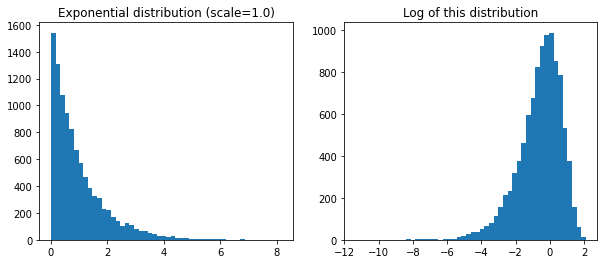

In [101]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The distribution we used for C looks quite different: the scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. 

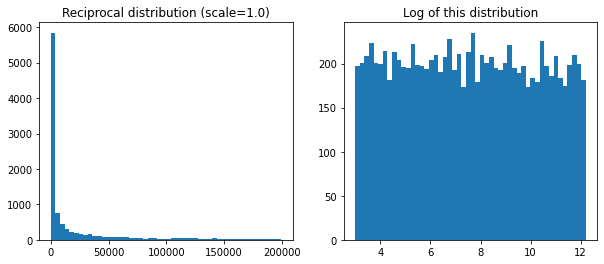

In [102]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The reciprocal distribution is useful when you have no idea what the scale of the hyperparameter should be (indeed, as you can see on the figure on the right, all scales are equally likely, within the given range), whereas the exponential distribution is best when you know (more or less) what the scale of the hyperparameter should be.

## 3.Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [103]:


def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [104]:
k=5

In [105]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  9, 10, 12])

In [106]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'bedrooms_per_room',
       'population_per_household', 'pop_per_hhold'], dtype='<U24')

In [107]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.326982327162615, 'median_income'),
 (0.1515559659408615, 'pop_per_hhold'),
 (0.10461045889757281, 'population_per_household'),
 (0.08479836130519176, 'bedrooms_per_room'),
 (0.07699738055141943, 'longitude')]

In [108]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [109]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [110]:
housing_prepared_top_k_features[0:3]

array([[-0.94135046, -0.8936472 , -0.12248362,  0.00622264,  1.        ],
       [ 1.17178212,  1.292168  , -0.91166333, -0.04081077,  0.        ],
       [ 0.26758118, -0.52543365, -0.3709391 , -0.07537122,  1.        ]])

In [111]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046, -0.8936472 , -0.12248362,  0.00622264,  1.        ],
       [ 1.17178212,  1.292168  , -0.91166333, -0.04081077,  0.        ],
       [ 0.26758118, -0.52543365, -0.3709391 , -0.07537122,  1.        ]])

## 4.Try creating a single pipeline that does the full data preparation plus the final prediction.

In [112]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [113]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income',
                                                   'rooms_per_household',
                                                   'bedro

In [114]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 82700.67249676 289993.49775958  94994.0476822  149567.31591275]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]


##5.Automatically explore some preparation options using GridSearchCV.

In [115]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  12.3s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  12.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  12.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  12.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  12.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  12.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  12.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  12.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  12.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total t

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                               

In [116]:
grid_search_prep.best_params_

{'feature_selection__k': 13, 'preparation__num__imputer__strategy': 'median'}

printing all the parameters along with their scores

In [117]:
cv_scores = grid_search.cv_results_


for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(-mean_score), params)

84695.9643558487 {'C': 10.0, 'kernel': 'linear'}
75229.96002564265 {'C': 30.0, 'kernel': 'linear'}
71129.6300474303 {'C': 100.0, 'kernel': 'linear'}
70067.853595282 {'C': 300.0, 'kernel': 'linear'}
69706.99486881915 {'C': 1000.0, 'kernel': 'linear'}
69602.94203595286 {'C': 3000.0, 'kernel': 'linear'}
69569.5149776468 {'C': 10000.0, 'kernel': 'linear'}
69563.09484798957 {'C': 30000.0, 'kernel': 'linear'}
118817.27084999392 {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}
118695.64195823687 {'C': 1.0, 'gamma': 0.03, 'kernel': 'rbf'}
118644.73334118741 {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
118775.8580764911 {'C': 1.0, 'gamma': 0.3, 'kernel': 'rbf'}
118900.28600079194 {'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}
118933.46595193472 {'C': 1.0, 'gamma': 3.0, 'kernel': 'rbf'}
118596.21675927243 {'C': 3.0, 'gamma': 0.01, 'kernel': 'rbf'}
118261.51402996934 {'C': 3.0, 'gamma': 0.03, 'kernel': 'rbf'}
118091.19769314774 {'C': 3.0, 'gamma': 0.1, 'kernel': 'rbf'}
118472.55082281143 {'C': 3.0, 'gamma': 0.